In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
data = pd.read_csv("anomaly_data.csv")

In [3]:
data.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0,0,75.0,0.000000,75,75,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0,0,2655.0,2261.327486,4254,1056,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/7/2019 1:24,141,0,3,...,0.0,0,0,70.5,0.707107,71,70,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,4/9/2019 3:58,151,0,2,...,0.0,0,0,151.0,0.000000,151,151,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/9/2019 1:41,153,2,1,...,0.0,0,0,76.5,0.707107,77,76,Anomaly,Mirai,Mirai-Hostbruteforceg


In [4]:
data.shape

(625783, 86)

In [5]:
null_check = data.isnull().sum()

null_check.to_csv('null_count')
#no null data has been found

In [6]:
data['Label'].unique()

array(['Anomaly', 'Normal'], dtype=object)

In [7]:
data['Fwd_PSH_Flags'].unique()

array([0], dtype=int64)

In [8]:
data['Bwd_PSH_Flags'].unique()

array([0, 1], dtype=int64)

In [9]:
data['Fwd_URG_Flags'].unique()

array([0], dtype=int64)

In [10]:
data['Bwd_URG_Flags'].unique()

array([0, 1], dtype=int64)

In [11]:
data['FIN_Flag_Cnt'].unique()

array([0, 1], dtype=int64)

In [12]:
data['RST_Flag_Cnt'].unique()

array([0, 1], dtype=int64)

In [13]:
data['URG_Flag_Cnt'].unique()

array([0, 1], dtype=int64)

In [14]:
data['CWE_Flag_Count'].unique()

array([0, 1], dtype=int64)

In [15]:
data['ECE_Flag_Cnt'].unique()

array([0, 1], dtype=int64)

In [16]:
data['Down/Up_Ratio'].unique()

array([ 1,  2,  0,  3,  4,  5, 10,  7,  8,  6, 13, 12, 11,  9, 14],
      dtype=int64)

In [17]:
data['Fwd_Byts/b_Avg'].unique()

array([0], dtype=int64)

In [18]:
data['Fwd_Pkts/b_Avg'].unique()

array([0], dtype=int64)

In [19]:
data['Fwd_Blk_Rate_Avg'].unique()

array([0], dtype=int64)

In [20]:
data['Bwd_Byts/b_Avg'].unique()

array([0], dtype=int64)

In [21]:
data['Bwd_Pkts/b_Avg'].unique()

array([0], dtype=int64)

In [22]:
data['Bwd_Blk_Rate_Avg'].unique()

array([0], dtype=int64)

In [23]:
data['Init_Fwd_Win_Byts'].unique()

array([-1], dtype=int64)

In [24]:
data['Fwd_Seg_Size_Min'].unique()

array([0], dtype=int64)

In [25]:
print(data[data.Label=='Anomaly'].shape)
print(data[data.Label=='Normal'].shape)

(585710, 86)
(40073, 86)


In [26]:
temp_ignore_cols = set(['Flow_ID', 'Label', 'Fwd_PSH_Flags', 'Fwd_URG_Flags', 'Fwd_Byts/b_Avg', 
                        'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg','Bwd_Byts/b_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg',
                        'Init_Fwd_Win_Byts', 'Fwd_Seg_Size_Min', 'Cat', 'Sub_Cat'])

In [27]:
cols = set(data.columns)

In [28]:
TRAIN_COLS = list(cols-temp_ignore_cols)
TG_COL = ["Label"]
print("Number of Features :", len(TRAIN_COLS))

Number of Features : 72


In [29]:
corr = data[TRAIN_COLS+TG_COL].corr()
corr

,Flow_IAT_Min,Init_Bwd_Win_Byts,Pkt_Len_Std,Flow_Pkts/s,Pkt_Len_Var,Protocol,Fwd_IAT_Max,SYN_Flag_Cnt,Subflow_Fwd_Byts,Bwd_IAT_Std,...,Idle_Min,Fwd_Header_Len,Down/Up_Ratio,Bwd_IAT_Tot,ECE_Flag_Cnt,Fwd_Pkt_Len_Mean,Subflow_Bwd_Byts,Active_Mean,Bwd_Pkt_Len_Min,Bwd_URG_Flags
Flow_IAT_Min,1.000000,0.114233,-0.077966,-0.087275,-0.072541,-0.162765,0.003300,0.616690,-0.094695,0.005444,...,0.889170,-0.114069,-0.124270,0.517580,0.003525,-0.113427,-0.101266,0.000680,-0.160546,0.002885
Init_Bwd_Win_Byts,0.114233,1.000000,-0.101205,-0.144553,-0.094366,-0.376601,0.019245,0.146240,-0.194007,0.032383,...,0.103672,-0.000521,-0.050248,0.085499,0.017206,-0.250515,-0.167309,0.017191,-0.311468,0.011131
Pkt_Len_Std,-0.077966,-0.101205,1.000000,-0.116850,0.985420,-0.125368,0.043067,-0.134224,0.047819,0.038730,...,-0.071483,-0.039874,-0.071502,-0.004320,-0.000454,-0.024389,0.127303,-0.002960,0.009205,0.002066
Flow_Pkts/s,-0.087275,-0.144553,-0.116850,1.000000,-0.107801,0.371634,-0.014181,-0.112178,-0.078895,-0.012519,...,-0.082030,0.278971,0.024729,-0.057120,-0.002499,-0.162782,-0.143019,-0.016867,-0.226770,-0.001972
Pkt_Len_Var,-0.072541,-0.094366,0.985420,-0.107801,1.000000,-0.140995,0.028399,-0.123984,0.005825,0.024852,...,-0.067105,-0.051751,-0.073902,-0.014532,-0.000428,-0.054446,0.115694,-0.007144,-0.024491,0.002507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Fwd_Pkt_Len_Mean,-0.113427,-0.250515,-0.024389,-0.162782,-0.054446,0.032943,0.011474,-0.199958,0.719441,0.000148,...,-0.107018,0.120772,0.389462,-0.080761,-0.004065,1.000000,0.145145,-0.025681,0.677063,-0.000232
Subflow_Bwd_Byts,-0.101266,-0.167309,0.127303,-0.143019,0.115694,-0.206127,0.047344,-0.171111,0.094838,0.021880,...,-0.093280,0.012799,-0.037296,0.024703,-0.001970,0.145145,1.000000,0.157076,0.494446,0.001071
Active_Mean,0.000680,0.017191,-0.002960,-0.016867,-0.007144,-0.028840,0.273009,0.132724,0.047625,0.202238,...,0.131824,0.124062,0.086154,0.287941,0.001867,-0.025681,0.157076,1.000000,-0.046243,-0.000396
Bwd_Pkt_Len_Min,-0.160546,-0.311468,0.009205,-0.226770,-0.024491,-0.167450,-0.022630,-0.275760,0.479139,-0.026420,...,-0.152617,-0.025158,0.178063,-0.125976,-0.004624,0.677063,0.494446,-0.046243,1.000000,0.000808


In [30]:
corr.to_csv('correlation_matrix')

In [31]:
print(cols)

{'Init_Bwd_Win_Byts', 'Pkt_Len_Std', 'Flow_Pkts/s', 'Init_Fwd_Win_Byts', 'Fwd_PSH_Flags', 'Pkt_Len_Var', 'Fwd_IAT_Max', 'SYN_Flag_Cnt', 'Active_Std', 'Pkt_Size_Avg', 'Bwd_IAT_Max', 'Fwd_IAT_Std', 'Bwd_IAT_Min', 'Bwd_Header_Len', 'Flow_IAT_Max', 'Bwd_Seg_Size_Avg', 'Bwd_IAT_Mean', 'Pkt_Len_Mean', 'Pkt_Len_Min', 'Dst_Port', 'RST_Flag_Cnt', 'Sub_Cat', 'ACK_Flag_Cnt', 'Src_Port', 'Active_Max', 'Flow_Byts/s', 'Fwd_Pkt_Len_Std', 'Fwd_IAT_Min', 'Pkt_Len_Max', 'Src_IP', 'Fwd_IAT_Mean', 'Tot_Bwd_Pkts', 'Idle_Mean', 'Fwd_Pkt_Len_Max', 'Flow_Duration', 'Cat', 'Bwd_Pkts/s', 'Active_Min', 'Idle_Min', 'Down/Up_Ratio', 'Bwd_IAT_Tot', 'Bwd_Pkt_Len_Min', 'Bwd_URG_Flags', 'Flow_IAT_Min', 'Protocol', 'Subflow_Fwd_Byts', 'Bwd_IAT_Std', 'Subflow_Bwd_Pkts', 'Timestamp', 'TotLen_Bwd_Pkts', 'Fwd_Pkts/s', 'Flow_ID', 'Fwd_Act_Data_Pkts', 'PSH_Flag_Cnt', 'Fwd_Byts/b_Avg', 'TotLen_Fwd_Pkts', 'Bwd_Pkt_Len_Std', 'Fwd_URG_Flags', 'Fwd_IAT_Tot', 'FIN_Flag_Cnt', 'Tot_Fwd_Pkts', 'Bwd_Pkts/b_Avg', 'Fwd_Pkt_Len_Min', 'La

In [32]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

In [33]:
data['Src_IP']= label_encoder.fit_transform(data['Src_IP'])

In [34]:
data['Dst_IP']= label_encoder.fit_transform(data['Dst_IP'])

In [35]:
data['Timestamp']= label_encoder.fit_transform(data['Timestamp'])

In [36]:
data['Label']= label_encoder.fit_transform(data['Label'])

In [37]:
data.head()
data.shape


(625783, 86)

In [38]:
train_data = data[TRAIN_COLS+TG_COL]


In [39]:
train_data.head()
train_data.shape

(625783, 73)

In [40]:
print(train_data[np.isfinite(train_data)])

        Flow_IAT_Min  Init_Bwd_Win_Byts  Pkt_Len_Std   Flow_Pkts/s  \
0                 75                 -1   258.652921  26666.666670   
1               1056              14600     0.000000    564.971751   
2                 70               1869   679.000000  21276.595740   
3                151               1869     0.000000  13245.033110   
4                 76                 -1    15.176737  19607.843140   
...              ...                ...          ...           ...   
625778           277                 -1     0.000000   7220.216606   
625779          1658              14600     0.000000   1206.272618   
625780            77              32679     0.000000  25974.025970   
625781           115               1869     0.000000  12500.000000   
625782            76                 -1     0.000000  15151.515150   

          Pkt_Len_Var  Protocol  Fwd_IAT_Max  SYN_Flag_Cnt  Subflow_Fwd_Byts  \
0        66901.333330        17            0             0               982   

In [41]:
import numpy as np


train_data= train_data[np.isfinite(train_data).all(1)]
# train_label = data['Label'] 
# train_label = train_label[np.isfinite(train_label).all(1)]
train_data.shape



(625415, 73)

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaler.transform(train_data)

array([[7.50202555e-04, 0.00000000e+00, 3.06849315e-01, ...,
        9.79452055e-01, 0.00000000e+00, 0.00000000e+00],
       [1.05628520e-02, 2.22793579e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [7.00189051e-04, 2.85339355e-02, 8.05522259e-01, ...,
        2.05479452e-02, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.70207956e-04, 4.98657227e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.15031058e-03, 2.85339355e-02, 0.00000000e+00, ...,
        9.50684932e-01, 0.00000000e+00, 1.00000000e+00],
       [7.60205255e-04, 0.00000000e+00, 0.00000000e+00, ...,
        9.79452055e-01, 0.00000000e+00, 0.00000000e+00]])

In [43]:
print(train_data.shape)
print(data['Label'].shape)

(625415, 73)
(625783,)


In [44]:
from sklearn.model_selection import train_test_split


y = train_data['Label']
X = train_data.drop(columns=['Label'])
# X = train_data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [45]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
  
dtree = DecisionTreeClassifier()
  
# fit the regressor with x and y data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [46]:
from sklearn.metrics import accuracy_score

Y_pred = dtree.predict(X_test)
Y_pred = np.where(Y_pred >=0.5, 1, 0)
print(accuracy_score(y_test, Y_pred))

0.999916855341085


In [47]:
import math
 
MSE = np.square(np.subtract(y_test, Y_pred)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.009118369312274326


In [48]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, f1_score, roc_auc_score

# Mean absolute error (MAE)
mae = mean_absolute_error(y_test, Y_pred)

# Mean squared error (MSE)
mse = mean_squared_error(y_test, Y_pred)

RMSE = math.sqrt(MSE)


# R-squared scores
r2 = r2_score(y_test, Y_pred)

F1 = f1_score(y_test, Y_pred)

roc_auc = roc_auc_score(y_test, Y_pred)



# Print metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('R-squared scores:', r2)

print("Root Mean Square Error:", RMSE)
print("F1 score:", F1)
print("ROC Auc score:", roc_auc)


Mean Absolute Error: 8.314465891502615e-05
Mean Squared Error: 8.314465891502615e-05
R-squared scores: 0.9985905339128909
Root Mean Square Error: 0.009118369312274326
F1 score: 0.9993396657692895
ROC Auc score: 0.9996713258822438


In [49]:
import pickle
# save the model to disk
filename = 'DecissionTree_model.sav'
pickle.dump(dtree, open(filename, 'wb'))

# some time later...
 
# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

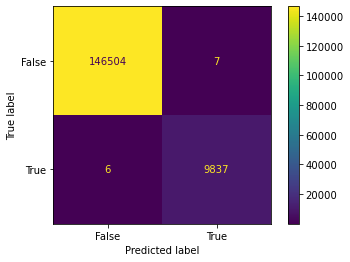

In [50]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

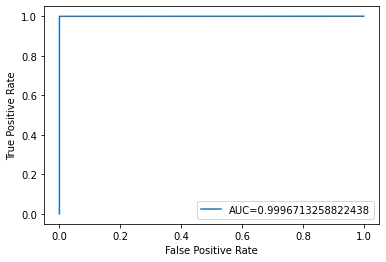

In [51]:
fpr, tpr, _ = metrics.roc_curve(y_test,  Y_pred)
auc = metrics.roc_auc_score(y_test, Y_pred)
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

In [52]:
sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('Specificity : ', specificity)

Sensitivity :  0.9999522220174595
Specificity :  0.9993904297470283
